In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

In [2]:
# #read the sdf file of 10 predictable molecules
# ligands_996 =Chem.SDMolSupplier('/Users/blair/Desktop/input/RF_Ustatistic/wholemol/ndonor.sdf')
# #create the ecfp fingerprint
# #x is the input, 2 is the radius
# morgan_996=[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=1024) for x in ligands_996]
# efp_996=np.array(morgan_996)
# efp_996.shape

In [3]:
# # #save the ecfp in a csv file
# pd.DataFrame(efp_996).to_csv('/Users/blair/Desktop/input/RF_Ustatistic/wholemol/ndonor.csv')

In [4]:
#define a function for normalizing in vertical order
def col_normalize(X):
    X1=np.matrix(X)
    X_1=X1.transpose()
    X_2=np.array(X_1)
    X_3=preprocessing.normalize(X_2,norm="l2")
    X_4=np.matrix(X_3)
    X_5=X_4.transpose()
    X_6=np.array(X_5)
    return X_6

In [5]:
#read the file containing the ecfp and isomer(1 or 2) and normalize
input=pd.read_csv('input_992.csv')#Put address
nfp_992=pd.read_csv('neuralfp.csv')
nfp_992=np.array(nfp_992)
print(len(nfp_992))
Isomer=input[['Isomer']].copy()
X_992=np.concatenate((nfp_992,Isomer),axis=1)
X_992=col_normalize(X_992)
X_992.shape

992


(992, 1025)

In [6]:
print(X_992)

[[0.01643665 0.01653608 0.01640464 ... 0.01642807 0.01644276 0.02008048]
 [0.01228736 0.01237125 0.01212976 ... 0.01224767 0.0123746  0.02008048]
 [0.01228736 0.01237125 0.01212976 ... 0.01224767 0.0123746  0.04016097]
 ...
 [0.07878195 0.07824839 0.07786125 ... 0.07760834 0.07828006 0.04016097]
 [0.09932951 0.09901206 0.09856281 ... 0.09809324 0.09889659 0.02008048]
 [0.09932951 0.09901206 0.09856281 ... 0.09809324 0.09889659 0.04016097]]


In [7]:
#assign the Hammett constants to Y
Y_992=input[['Hammett Constant']].copy()
Y_992=np.array(Y_992)

In [8]:
nfp_ndonor=pd.read_csv('neuralfp_ndonor.csv')
nfp_ndonor=np.array(nfp_ndonor)
nfp_ndonor=col_normalize(nfp_ndonor)
X_ndonor=nfp_ndonor
X_ndonor.shape

(10, 1025)

In [9]:
print(X_ndonor)

[[0.17199353 0.16893486 0.17021832 ... 0.17009704 0.17031577 0.31622777]
 [0.11698712 0.11193134 0.11383395 ... 0.11309437 0.11321048 0.31622777]
 [0.05717196 0.05606311 0.0566171  ... 0.05589479 0.05746216 0.31622777]
 ...
 [0.28574257 0.28521284 0.28333261 ... 0.28339505 0.28474482 0.31622777]
 [0.5101672  0.51148256 0.51183047 ... 0.51231197 0.51028695 0.31622777]
 [0.45152274 0.45533033 0.45364624 ... 0.45388825 0.45543593 0.31622777]]


In [10]:
#create null list to record values later
MSE_boot=np.zeros((1000),dtype= float)
#Index= np.zeros((1000,662),dtype=int)
Y_prediction_train=np.zeros((992,1000),dtype=float)
#Y_prediction_test=np.zeros((334,1000),dtype=float)
Y_pred_all=np.zeros((992,1000),dtype=float)
Y_target_train=np.zeros((992,1000),dtype=float)
#Y_target_test=np.zeros((334,1000),dtype=float)
Y_prediction_ndonor=np.zeros((10,1000),dtype=float)
MSE_boot=np.zeros((1000),dtype= float)
print(Y_target_train[0].shape)

(1000,)


In [11]:
regr = RandomForestRegressor(n_estimators=1, max_depth=None, random_state=None,bootstrap=0)

In [12]:
for m in range(0,1000):
    #positive part
    index_992=np.random.choice(992, size=992, replace=1)
    X_train=X_992[index_992]
    Y_train=Y_992[index_992]
    X_test=np.delete(X_train,index_992,axis=0)
    Y_test=np.delete(Y_train,index_992,axis=0)
    #Y_positive_left.shape
    #negative part
#     index_negative=np.random.choice(183, size=183, replace=1)
#     X_121=X_183[index_negative]
#     Y_121=Y_negative[index_negative]
#     X_negative_left=np.delete(X_183,index_negative,axis=0)
#     Y_negative_left=np.delete(Y_negative,index_negative,axis=0)
#     #neutral part
#     index_zeros=np.random.choice(28, size=28, replace=1)
#     X_18=X_28[index_zeros]
#     Y_18=Y_zeros[index_zeros]
#     X_zeros_left=np.delete(X_28,index_zeros,axis=0)
#     Y_zeros_left=np.delete(Y_zeros,index_zeros,axis=0)
#     #target
#     X_662=np.concatenate((X_523,X_121,X_18),axis=0)
#     Y_662=np.concatenate((Y_523,Y_121,Y_18),axis=0)
#     X_662, Y_662 = shuffle(X_662, Y_662)
#     #X_662.shape
#     #print(Y_662.shape)
#     #left
#     X_left=np.concatenate((X_positive_left,X_negative_left,X_zeros_left),axis=0)
#     Y_left=np.concatenate((Y_positive_left,Y_negative_left,Y_zeros_left),axis=0)
#     Y_target_train[:,m]=Y_662.ravel()
#     #Y_target_test[:,m]=Y_left.ravel()
#     #Y_left.shape
#     #RF
    X_resample= X_train
    Y_resample= Y_train
    regr.fit(X_resample, Y_resample.ravel())
    Y_pred_train=regr.predict(X_resample)    #Fit RF on training set
    Y_pred_test=regr.predict(X_test)        #Fit RF on testing set
    Y_pred_all_each=regr.predict(X_992)     # Fit RF on complete database
    Y_pred_all[:,m]=Y_pred_all_each
    #Y_prediction_test[:,m]=Y_pred_left
    Y_prediction_train[:,m]=Y_pred_train
    #Y_pred_all=regr.predict(X_996)
    Y_pred_ndonor=regr.predict(X_ndonor)    # Fit RF on ndonor
    Y_prediction_ndonor[:,m]=Y_pred_ndonor
    MSE_train=mean_squared_error(Y_resample, Y_pred_train)
    MSE_test=mean_squared_error(Y_test, Y_pred_test)
    MSE_boot[m]=(MSE_train*0.368)+(0.632)*(MSE_test)

In [13]:
Y_prediction_mean=Y_pred_all.mean(axis=1)
Y_prediction_mean

array([ 2.80270000e-01,  4.14500000e-02,  5.95700000e-02, -3.26245000e-01,
       -3.58590000e-01,  4.02150000e-01,  4.63390000e-01,  2.96050000e-01,
        1.59960000e-01,  5.43290000e-01,  5.77410000e-01,  7.16830000e-01,
        7.64530000e-01,  3.14390000e-01,  3.31900000e-01,  3.11810000e-01,
        3.16830000e-01,  4.61030000e-01,  5.09645000e-01,  1.94760000e-01,
        1.05000000e-01,  4.10810000e-01,  4.46070000e-01,  3.96240000e-01,
        4.89520000e-01,  4.18910000e-01,  4.83110000e-01,  4.99630000e-01,
        5.17023333e-01,  3.13300000e-01,  3.30530000e-01,  4.61130000e-01,
        5.21450000e-01,  3.89333333e-02, -2.64600000e-02,  1.51905381e-01,
        1.53800667e-01, -9.32400000e-02, -1.28940000e-01, -7.14000000e-02,
       -1.35750000e-01, -5.34700000e-02,  1.65220000e-01, -1.34100000e-01,
        1.45145333e-01,  1.42568667e-01,  1.88050000e-01,  1.69650000e-01,
        6.19445000e-02, -6.48600000e-02,  1.45260000e-01,  1.36817500e-01,
        1.24196667e-01,  

In [14]:
Y_prediction_std=Y_pred_all.std(axis=1)
Y_prediction_std

array([0.05285288, 0.11053686, 0.12090622, 0.29148623, 0.25728644,
       0.14283164, 0.13542824, 0.24231611, 0.30778726, 0.05786429,
       0.0676446 , 0.15460547, 0.17191503, 0.11088926, 0.13777805,
       0.11827774, 0.13689358, 0.11478064, 0.11787196, 0.12069773,
       0.14240225, 0.07398002, 0.09473888, 0.07594249, 0.08480666,
       0.07100924, 0.06911026, 0.09304925, 0.10112575, 0.08901859,
       0.09863782, 0.08126391, 0.09392868, 0.09274826, 0.11569904,
       0.11974551, 0.12953668, 0.08130992, 0.07339943, 0.08144225,
       0.09861155, 0.08353837, 0.15461679, 0.10267809, 0.12698311,
       0.13087757, 0.0678756 , 0.08294925, 0.13452929, 0.17309529,
       0.11891649, 0.12441474, 0.09454945, 0.09930266, 0.18813877,
       0.21554527, 0.21358162, 0.25642126, 0.10125488, 0.13373804,
       0.14317534, 0.16078375, 0.12661475, 0.14236123, 0.07143106,
       0.06699926, 0.1363518 , 0.15632538, 0.18702507, 0.26411251,
       0.26338478, 0.0841007 , 0.09091577, 0.09093002, 0.10369

In [15]:
sigma1=Y_prediction_std*2.03/(1000**0.5)
#sigma1.min()

In [16]:
MSE_all=mean_squared_error(Y_prediction_mean,Y_992)
MSE_all

0.003680712131250609

In [17]:
#n_donor with NH2
Y_ndonor_mean=Y_prediction_ndonor.mean(axis=1)
print("        NOC,        NC,            N,           NCF3,       NNO2")
Y_ndonor_mean

        NOC,        NC,            N,           NCF3,       NNO2


array([1.1907 , 1.1907 , 0.97844, 1.1907 , 1.1907 , 1.1907 , 1.1907 ,
       1.1907 , 1.1907 , 1.1907 ])

In [18]:
# print("  NOC,        NC,         N,           NCF3,       NNO2,     imidazole_OC")
# print(Y_ndonor_mean)

In [19]:
Y_ndonor_std=Y_prediction_ndonor.std(axis=1)
Y_ndonor_std

array([0.35840356, 0.35840356, 0.38607068, 0.35840356, 0.35840356,
       0.35840356, 0.35840356, 0.35840356, 0.35840356, 0.35840356])

In [20]:
sigma2=Y_ndonor_std*2.03/(1000**0.5)
sigma2

array([0.02300744, 0.02300744, 0.02478351, 0.02300744, 0.02300744,
       0.02300744, 0.02300744, 0.02300744, 0.02300744, 0.02300744])

In [21]:
#pd.DataFrame(Y_prediction_mean).to_csv('Y_prediction_mean_with_norm.csv')#Put address

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)
# filename = 'Y_all.csv'
# df = pd.read_csv(filename)
# #df1= pd.read_csv('FEC_10000.csv')
# df.columns#, df1.columns

#Plot parameters

xlow = -1.5
xhigh = 2.5


x=input['Hammett Constant']
y=Y_prediction_mean
y_err=[Y_prediction_std,Y_prediction_std]

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


Text(-1.4, 1.9, 'Test set: 992 data points')

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


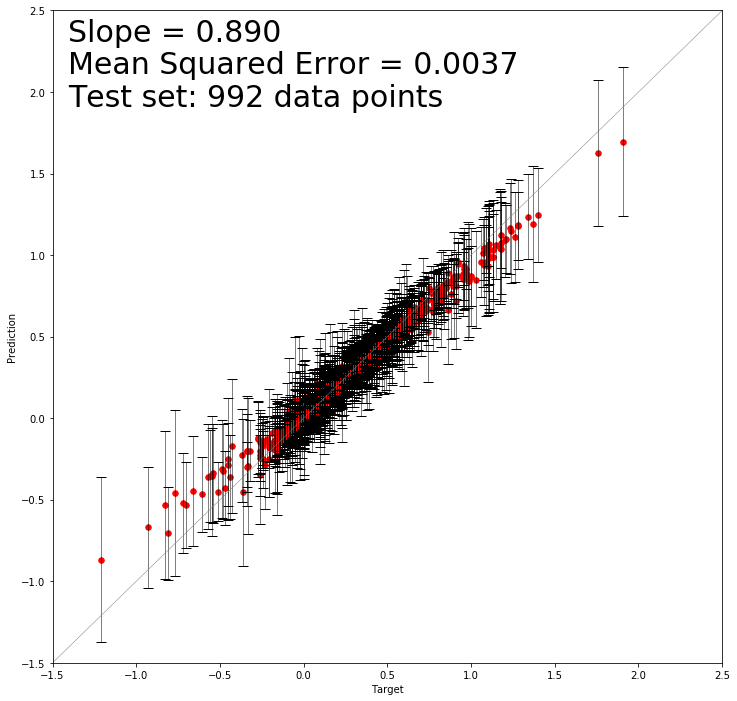

In [23]:
def scatplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots(figsize=(12,12))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.scatter(x_data, y_data, color = 'red',s=30)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data,  
                yerr = error_data, 
                color = 'black', 
                ls = 'none', 
                lw = 0.5, capsize = 5)
    plt.xlim(xlow,xhigh)
    plt.ylim(xlow,xhigh)
    ax.plot([xlow, xhigh], [xlow, xhigh], color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title,fontsize=22.5)
    

# Call the function to create plot
scatplot(x_data = x, 
         y_data = y,
         error_data = y_err,
         x_label = 'Target',
         y_label = 'Prediction',
         title = '')

plt.annotate('Slope = 0.890', 
             xy=(-1.4, 2.3),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Mean Squared Error = 0.0037', 
             xy=(-1.4, 2.1),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Test set: 992 data points', 
             xy=(-1.4, 1.9),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
        
#Plotting prediction for inputs without 
#plt.scatter(x1, y1, color = 'green',s=30)
#plt.errorbar(x1, y1,yerr = y1_err, color = 'k', ls = 'none', lw = 0.5, capsize = 5)
#plt.show()